# 딥러닝 기초

## CH6 과제

## 2020100381 안정빈

## 6-1. 매개변수 갱신
* 신경망 학습의 목적은 손실 함수의 값을 가능한 낮게 하는 매개변수를 찾는 것.
* => 즉 매개변수의 최적값을 찾는 문제로, 이러한 문제를 푸는 작업을 **최적화**라고 함.

### 6-1-2 확률적 경사 하강법(SGD) 및 단점
정의:
* 매개변수의 기울기를 이용해, 기울어진 방향으로 매개변수 값을 몇번이고 반복하여, 최적의 값에 다가가는 방법.
* 가중치 매개변수를 (학습률 X 매개변수의 기울기)만큼 빼는 작업을, 지정한 횟수만큼 반복
  
단점:
* 비등방성 함수(방향에 따라 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적(최솟값까지 지그재그의 형태로 이동).
* 또한, 기울어진 방향이, 본래의 최솟값과 다른 방향을 가리킨다는 단점 존재.

In [17]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr=lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6-1-4. 모멘텀
* 현재 위치에서의 기울기를 참고해서 속도를 정하고, 그 속도를 따라 가중치(파라미터)를 업데이트하는 방식
* 공이 그릇의 바닥을 구르는 듯한 움직임을 보이며, SGD에 비해, x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.

In [18]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr=lr
        self.momentum=momentum
        self.v=None

    def update(self, params, grads):
        if self.v is None:
            self.v={}
            for key, val in params.items():
                self.v[key] = np.zeros_lie(val)
        for key in paramskeys():
            self.v[key]=self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

### 6-1-5. AdaGrad
신경망 학습에서는 학습률 값이 중요. 학습률이 작으면 학습 시간이 길어지고, 너무 크면 발산하여 학습이 제대로 진행되지 않음.

학습률을 정하는 효과적 기술로 **학습률 감소**가 존재. => 학습을 진행하면서 학습률을 점차 줄여가는 방법

학습률을 서서히 낮추는 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것. 이를 발전시킨 기법이 **AdaGrad**
* AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행
* 가중치 매개변수의 기울기의 제곱인 h를 이용해, 학습률 X 1/h**0.5 X 기울기한 값을 빼며, 가중치 매개변수 업데이트
* 매겨변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아진다.
* 과거의 기울기를 제곱하여 계속 더하는 방식으로 학습을 진행할 수록, 갱신 강도가 약해진다.
* 이를 해결하기 위해 **RMSProp**라는 방법이 존재

In [19]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr=lr
        self.h=None

    def update(self, params, grads):
        if self.h is None:
            self.h={}
            for key, val in params.items():
                self.h[key] = np.zeros_lie(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6-1-6. Adam
* 모멘텀과, AdaGrad를 융합한 새로운 방법.
* 하이퍼파라미터의 '편향 보정'이 진행
* 모멘텀과 비슷한 패턴이나, 모멘텀 때보다 공의 좌우 흔들림이 적다.
* 학습률, B1, B2(일,이차 모멘텀용 계수) 총 3개의 하이퍼파라미터 존재

### 6-1-7. 어느 갱신 방법을 이용할 것인가?
* 아직까지 모든 문제에서 항상 뛰어난 기법은 없음
* 각각의 장단이 존재하며, 학습률 등의 하이퍼파라미터에 따라서도 결과가 다르게 나타남.

## 6-2. 가중치의 초깃값
* 신경망 학습에서는 가중치의 초깃값이 특히 중요.
* 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가르기도 함.

### 6-2-1. 초깃값을 0으로 하면?
* **가중치 감소**는 가중치 매개변수의 값이 작아지도록 학습하는 방법으로, 가중치 값을 작게 하여 과대적합이 일어나지 않게 하는 것.
* 가중치를 작게 만들고 싶으면, 초깃값도 작은 값에서 시작하는 것이 절대적이나, 초깃값을 0으로 하거나, 균일한 값으로 설정 시,
* 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기에, 가중치를 여러 개 갖는 의미가 사라지게 된다.

### 6-2-2. 은닉층의 활성화값 분포

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000,10)
node_num= 100 # 은닉층 뉴런 수
hidden_layer_size= 5
activations = {}
for i in range(hidden_layer_size):
    if i == 0:
        w = np.random.randn(10, node_num) * 1
        a = np.dot(x, w)
    else:
        x = activations[i - 1]
        w = np.random.randn(node_num, node_num) * 1
        a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

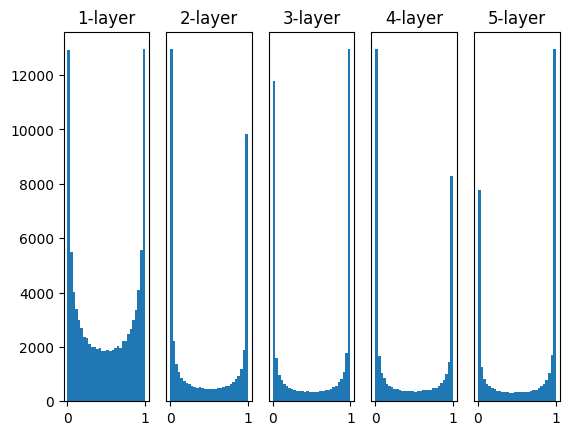

In [21]:
# 히스토그램
for i,a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포된 것을 확인할 수 있음.

위에서 사용한 시그모이드 함수는 출력이 0이나 1에 가까워지면, 미분값이 0에 근접 즉, **기울기 소실** 문제 발생

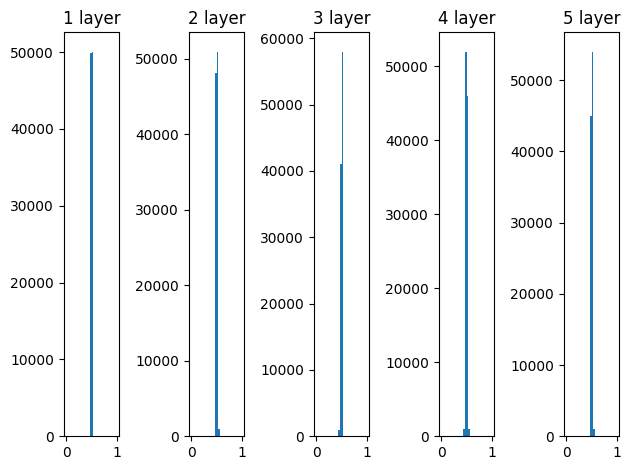

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 10)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i == 0:
        w = np.random.randn(10, node_num) * 0.01  # 작은 값으로 초기화
        a = np.dot(x, w)
    else:
        x = activations[i - 1]
        w = np.random.randn(node_num, node_num) * 0.01  # 작은 값으로 초기화
        a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

# ✅ 시각화
for i, activation in activations.items():
    plt.subplot(1, hidden_layer_size, i + 1)
    plt.title(f"{i+1} layer")
    plt.hist(activation.flatten(), bins=30, range=(0, 1))

plt.tight_layout()
plt.show()


표준편차가 0.01인 정규분포로 초기화 시, 0.5 부근에 집중

다수의 뉴런이 거의 같은 값을 출력하므로, 뉴런을 여러 개 둔 의미가 사라짐.

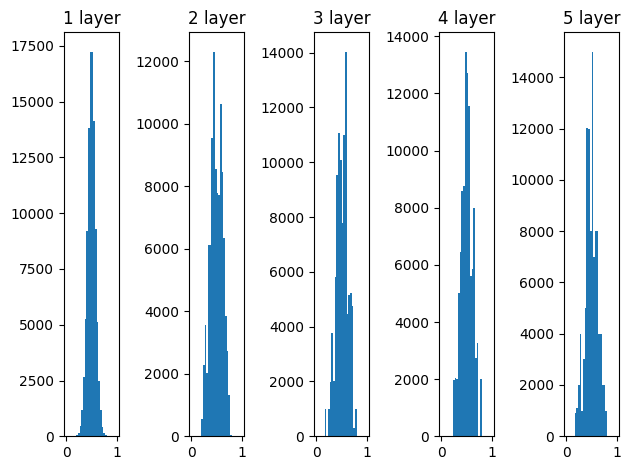

In [23]:
# Xavier 초깃값을 이용
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 10)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i == 0:
        w = np.random.randn(10, node_num) / np.sqrt(node_num)
        a = np.dot(x, w)
    else:
        x = activations[i - 1]
        w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

# ✅ 시각화
for i, activation in activations.items():
    plt.subplot(1, hidden_layer_size, i + 1)
    plt.title(f"{i+1} layer")
    plt.hist(activation.flatten(), bins=30, range=(0, 1))

plt.tight_layout()
plt.show()

Xavier 초깃값 사용 결과로, 확실히 넓게 분포되어 시그모이드 함수의 표현력도 제한받지 않고 효율적인 학습이 가능해짐.

### 6-2-3. ReLU를 사용할 때의 가중치 초깃값
* 시그모이드, 탄젠트 함수는 좌우 대칭이라, 중앙 부근이 선형인 함수로 ==> **Xavier** 초기값이 적절
* ReLU는 음의 영역이 0이기에, 더 넓게 분포시키기 위해 2배의 계수를 사용하는 **he**초깃값이 적절

## 6-3. 배치 정규화
**장점**:
* 학습 속도 개선
* 초깃값에 크게 의존X
* 과대적합 억제

**개념**:
* 학습 시 미니배치를 단위로, 데이터 분포가 평균 0, 분산 1이 되도록 정규화
* 활성화 함수의 앞에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.
* 확대와 이동 변환을 수행

## 6-4. 바른 학습을 위해
* **과대적합**: 신경망이 훈련 데이터에만 지나치게 적응되어, 그 외의 데이터에서는 제대로 대응하지 못하는 상태
* 주로, **매개변수가 많고, 표현력이 높은 모델**, **훈련 데이터가 적은 경우**에 발생

In [24]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=False)
x_train=x_train[:300]
t_train=t_train[:300]

In [25]:
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)  # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

epoch_cnt = 0
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11, test acc:0.1009
epoch:1, train acc:0.15, test acc:0.1199
epoch:2, train acc:0.15, test acc:0.1383
epoch:3, train acc:0.17333333333333334, test acc:0.1569
epoch:4, train acc:0.19333333333333333, test acc:0.1763
epoch:5, train acc:0.22, test acc:0.2028
epoch:6, train acc:0.25666666666666665, test acc:0.2236
epoch:7, train acc:0.27666666666666667, test acc:0.2415
epoch:8, train acc:0.30666666666666664, test acc:0.2576
epoch:9, train acc:0.34, test acc:0.2733
epoch:10, train acc:0.3566666666666667, test acc:0.2868
epoch:11, train acc:0.37, test acc:0.3035
epoch:12, train acc:0.38333333333333336, test acc:0.3181
epoch:13, train acc:0.4033333333333333, test acc:0.3216
epoch:14, train acc:0.43, test acc:0.3273
epoch:15, train acc:0.41, test acc:0.3269
epoch:16, train acc:0.4266666666666667, test acc:0.3364
epoch:17, train acc:0.4666666666666667, test acc:0.3554
epoch:18, train acc:0.47333333333333333, test acc:0.369
epoch:19, train acc:0.48, test acc:0.3913
epoch:20, 

KeyboardInterrupt: 

### 6-4-2. 가중치 감소
* 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 과대적합을 억제하는 방법.
* 가중치 감소는 모든 가중치 각각의 손실 함수에 1/2 X 람다(정규화 세기를 조절하는 파라미터) X 가중치제곱값)을 더한다.
* ==> 훈련 데이터에 대한 정확도가 떨어질 순 있으나, 테스트 데이터와의 성능 차이가 감소한다.

### 6-4-3. 드롭아웃
* 신경망 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제하면서 학습하는 방법.
* 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다.
* 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력
* ===> 모델의 표현력을 높이면서도 과대적합을 억제할 수 있음.

In [13]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

## 6-5. 적절한 하이퍼파라미터 값 찾기
* 각 층의 뉴런 수, 배치 크기, 학습률, 가중치 감소 등을 의미
* 적절하지 못한 하이퍼파라미터값을 사용시, 모델의 성능이 크게 떨어진다.

### 6-5-1. 검증 데이터
* 하이퍼 파라미터의 성능을 평가할 때, 시험 데이터를 사용시, 하이퍼 파라미터의 값이 시험 데이터에만 적합하도록 조정되어 버림.
* ==> 하이퍼 파라미터를 확인하는 데이터를 **검증 데이터**라고 함.
* 훈련 데이터: 매개변수 학습
* 검증 데이터: 하이퍼파라미터 성능 평가
* 시험 데이터: 신경망의 범용 성능 평가

In [14]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test)=load_mnist()

# 훈련 데이터 뒤섞음
x_train, t_train =shuffle_dataset(x_train, t_train)
# 20% 검증 데이터로 분할
validation_rate= 0.2
validation_num=int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val=t_train[:validation_num]
x_train = x_train[validation_num :]
t_train = t_train[validation_num :]

### 6-5-2. 하이퍼파라미터 최적화
* 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여가는 방식.
* 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 샘플링 후, 그 값으로 정확도 평가
* 이러한 작업을 반복하며 '최적 값'의 범위를 좁혀감.

**과정:**
* 0단계: 하이퍼파라미터 값의 범위를 설정
* 1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
* 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습, 검증 데이터로 정확도를 평가( 에포크는 작게 설정)
* 3단계: 1,2 단계를 특정 횟수 반복하여, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁혀감.

In [16]:
weight_dcay=10**np.random.uniform(-8, -4)
lr= 10 ** np.random.uniform(-6,-2)